In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 


In [128]:
from sklearn.datasets import load_iris
data=load_iris()
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [129]:
dir(data)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [130]:
data.data.shape

(150, 4)

In [131]:
x=data.data
x.shape

(150, 4)

In [132]:
y=data.target
y.shape

(150,)

In [133]:
from sklearn.model_selection import train_test_split ## Training And Testing
from sklearn.linear_model import LogisticRegression ## Logistic Regression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report ## Accuracy score ,Confusion matrix, Classification Report 
from sklearn.preprocessing import StandardScaler   ##Scaling the value 


In [134]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

print('xtrain=',xtrain.shape)
print('xtest=',xtest.shape)
print('ytrain=',ytrain.shape)
print('ytest=',ytest.shape)

xtrain= (120, 4)
xtest= (30, 4)
ytrain= (120,)
ytest= (30,)


In [135]:
##Normalizing/Scaling the value 
scaler=StandardScaler()
scaler.fit(xtrain)

StandardScaler()

In [136]:
scaled_xtrain=scaler.fit_transform(xtrain)
scaled_xtest=scaler.fit_transform(xtest)

In [137]:
#Logistic regression 
log_reg = LogisticRegression()
log_reg.fit(scaled_xtrain,ytrain)

LogisticRegression()

In [138]:
ypred=log_reg.predict(scaled_xtest)
ypred

array([2, 1, 0, 2, 0, 2, 0, 2, 2, 1, 2, 2, 1, 2, 2, 0, 2, 1, 0, 0, 2, 2,
       0, 0, 2, 0, 0, 1, 1, 0])

In [139]:
df_predicted=pd.DataFrame()
df_predicted['Actual']=ytest
df_predicted['Predicted']=ypred
df_predicted.head()

,Actual,Predicted
0,2,2
1,1,1
2,0,0
3,2,2
4,0,0


In [140]:
matrix = confusion_matrix(ytest,ypred)
matrix

array([[11,  0,  0],
       [ 0,  6,  7],
       [ 0,  0,  6]], dtype=int64)

Text(69.0, 0.5, 'Predicted values')

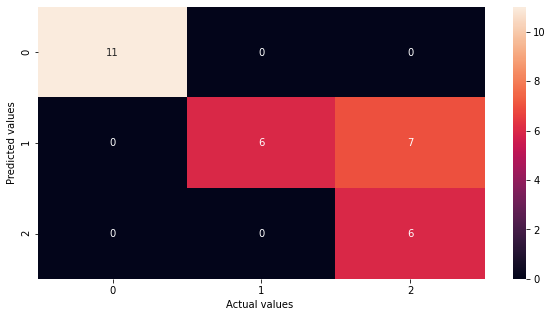

In [141]:
plt.figure(figsize=(10,5))
sns.heatmap(matrix,annot=True)
plt.xlabel('Actual values ')
plt.ylabel('Predicted values')

In [142]:
print('Accuracy=',accuracy_score(ytest,ypred)*100)

Accuracy= 76.66666666666667


In [143]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.46      0.63        13
           2       0.46      1.00      0.63         6

    accuracy                           0.77        30
   macro avg       0.82      0.82      0.75        30
weighted avg       0.89      0.77      0.77        30



#Using Ensemble technique 

In [144]:
##Using Bagging Classifier 
from sklearn.ensemble import BaggingClassifier
bag_model=BaggingClassifier(n_estimators=8)
bag_model.fit(scaled_xtrain,ytrain)

BaggingClassifier(n_estimators=8)

In [145]:
bag_pred=bag_model.predict(scaled_xtest)
bag_pred

array([2, 1, 0, 2, 0, 2, 0, 2, 1, 1, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 2, 2,
       0, 0, 2, 0, 0, 1, 1, 0])

In [146]:
print('Accuracy=',accuracy_score(ytest,bag_pred)*100)

Accuracy= 80.0


In [147]:
matrix1=confusion_matrix(ytest,bag_pred)
matrix1

array([[11,  0,  0],
       [ 0,  8,  5],
       [ 0,  1,  5]], dtype=int64)

In [148]:
By Ensemble Technique we got high accuracy than Logistic Regression.